<>:10: SyntaxWarning: invalid escape sequence '\E'
<>:10: SyntaxWarning: invalid escape sequence '\E'
C:\Users\isidr\AppData\Local\Temp\ipykernel_13132\1943799543.py:10: SyntaxWarning: invalid escape sequence '\E'
  img_cropped = read_and_crop_image('data2025simil2026\Experiment-769--01.jpg')


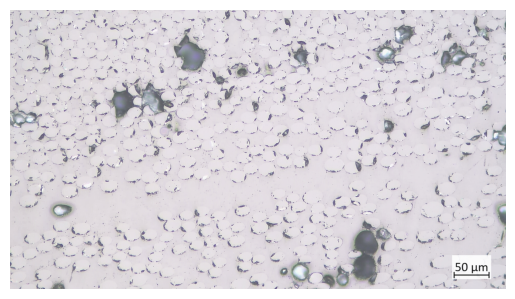

In [1]:
import cv2, matplotlib.pyplot as plt

def read_and_crop_image(path):
    import cv2, numpy as np
    img = cv2.imread(path)
    h, w = img.shape[:2]
    img = img[:h-290, :, :]  # or use auto-detection like above
    return img

img_cropped = read_and_crop_image('data2025simil2026\Experiment-769--01.jpg')

plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))
# plt.title("Cropped image")
plt.axis("off")
plt.show()

In [20]:
img_cropped

array([[[226, 221, 223],
        [221, 218, 220],
        [221, 217, 222],
        ...,
        [198, 189, 192],
        [185, 174, 176],
        [176, 165, 167]],

       [[226, 221, 223],
        [221, 218, 220],
        [221, 217, 222],
        ...,
        [209, 200, 203],
        [196, 188, 189],
        [187, 179, 180]],

       [[223, 218, 220],
        [221, 218, 220],
        [224, 220, 225],
        ...,
        [202, 193, 196],
        [198, 189, 192],
        [203, 196, 199]],

       ...,

       [[216, 212, 218],
        [216, 212, 218],
        [216, 212, 218],
        ...,
        [212, 205, 208],
        [212, 205, 208],
        [212, 205, 208]],

       [[216, 212, 218],
        [216, 212, 218],
        [216, 212, 218],
        ...,
        [213, 206, 209],
        [212, 205, 208],
        [212, 205, 208]],

       [[216, 212, 217],
        [216, 212, 217],
        [217, 213, 218],
        ...,
        [212, 207, 209],
        [211, 206, 208],
        [211, 206, 208]]

In [2]:
global_parameters = [

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 80,
    'cont_mult': 2,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 2,
    'bhm_mult': 60,
    'cont_mult': 1,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
}
]

In [8]:
global_parameters[0]

{'first_kernel_size': (5, 5),
 'second_kernel_size': (3, 3),
 'contours_mult': 2.5,
 'bh_ks': (7, 7),
 'bhm_iter': 4,
 'bhm_mult': 60,
 'cont_mult': 2.5,
 'ws_ths_factor': 0.025,
 'ws_gl_vecinity': 15}

In [13]:
import getmeresults as gmr
import generaluse as gu

path = 'data2025simil2026\Experiment-769--01.jpg'

params = {
    'first_kernel_size': (3, 3),   # smaller kernel for slight denoising; preserves edges
    'second_kernel_size': (3, 3),  # secondary blur for refining thresholding
    'contours_mult': 2.0,          # moderate factor for contour detection (avoid over-detection)
    'bh_ks': (5, 5),               # kernel for black-hat operation; small to reveal pore edges
    'bhm_iter': 3,                 # few iterations; prevents over-darkening
    'bhm_mult': 50,                # contrast multiplier for dark regions; moderate
    'cont_mult': 2.0,              # similar to contours_mult; balanced edge enhancement
    'ws_ths_factor': 0.035,        # threshold sensitivity; slightly higher for pale background
    'ws_gl_vecinity': 12,          # window size for local threshold; smaller because uniform illumination
}


imagen = gu.getImagesFromPathfile([path],cv2.COLOR_BGR2GRAY)
imagen = imagen[0]

<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
C:\Users\isidr\AppData\Local\Temp\ipykernel_13132\1339023625.py:4: SyntaxWarning: invalid escape sequence '\E'
  path = 'data2025simil2026\Experiment-769--01.jpg'


In [27]:
imagen

array([[222, 219, 219, ..., 191, 176, 167],
       [222, 219, 219, ..., 202, 189, 180],
       [219, 219, 222, ..., 195, 191, 198],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   0, ...,   0,   0,   0]],
      shape=(1370, 1920), dtype=uint8)

In [28]:
h, w = imagen.shape[:2]
img_nueva = imagen[:h-290, :]  # or use auto-detection like above

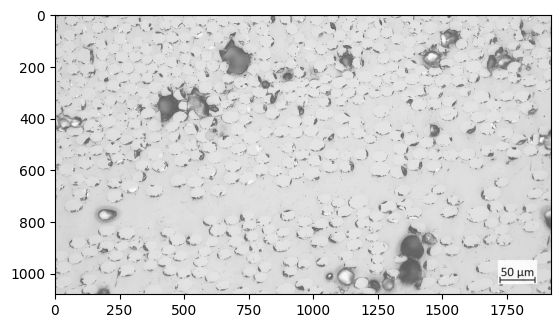

In [30]:
plt.imshow(cv2.cvtColor(img_nueva, cv2.COLOR_BGR2RGB))


In [19]:
imagen

array([[222, 219, 219, ..., 191, 176, 167],
       [222, 219, 219, ..., 202, 189, 180],
       [219, 219, 222, ..., 195, 191, 198],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   0, ...,   0,   0,   0]],
      shape=(1370, 1920), dtype=uint8)

In [23]:
img_cropped2 = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)


In [24]:
img_cropped2

array([[[223, 221, 226],
        [220, 218, 221],
        [222, 217, 221],
        ...,
        [192, 189, 198],
        [176, 174, 185],
        [167, 165, 176]],

       [[223, 221, 226],
        [220, 218, 221],
        [222, 217, 221],
        ...,
        [203, 200, 209],
        [189, 188, 196],
        [180, 179, 187]],

       [[220, 218, 223],
        [220, 218, 221],
        [225, 220, 224],
        ...,
        [196, 193, 202],
        [192, 189, 198],
        [199, 196, 203]],

       ...,

       [[218, 212, 216],
        [218, 212, 216],
        [218, 212, 216],
        ...,
        [208, 205, 212],
        [208, 205, 212],
        [208, 205, 212]],

       [[218, 212, 216],
        [218, 212, 216],
        [218, 212, 216],
        ...,
        [209, 206, 213],
        [208, 205, 212],
        [208, 205, 212]],

       [[217, 212, 216],
        [217, 212, 216],
        [218, 213, 217],
        ...,
        [209, 207, 212],
        [208, 206, 211],
        [208, 206, 211]]

In [16]:
perc1, seg1, col1 = gmr.getMeResults(imagen, params)

In [17]:
perc2, seg2, col2 = gmr.getMeResults(imagen,global_parameters[0])

In [31]:
perc3, seg3, col3 = gmr.getMeResults(img_nueva, params)
perc4, seg4, col4 = gmr.getMeResults(img_nueva,global_parameters[0])

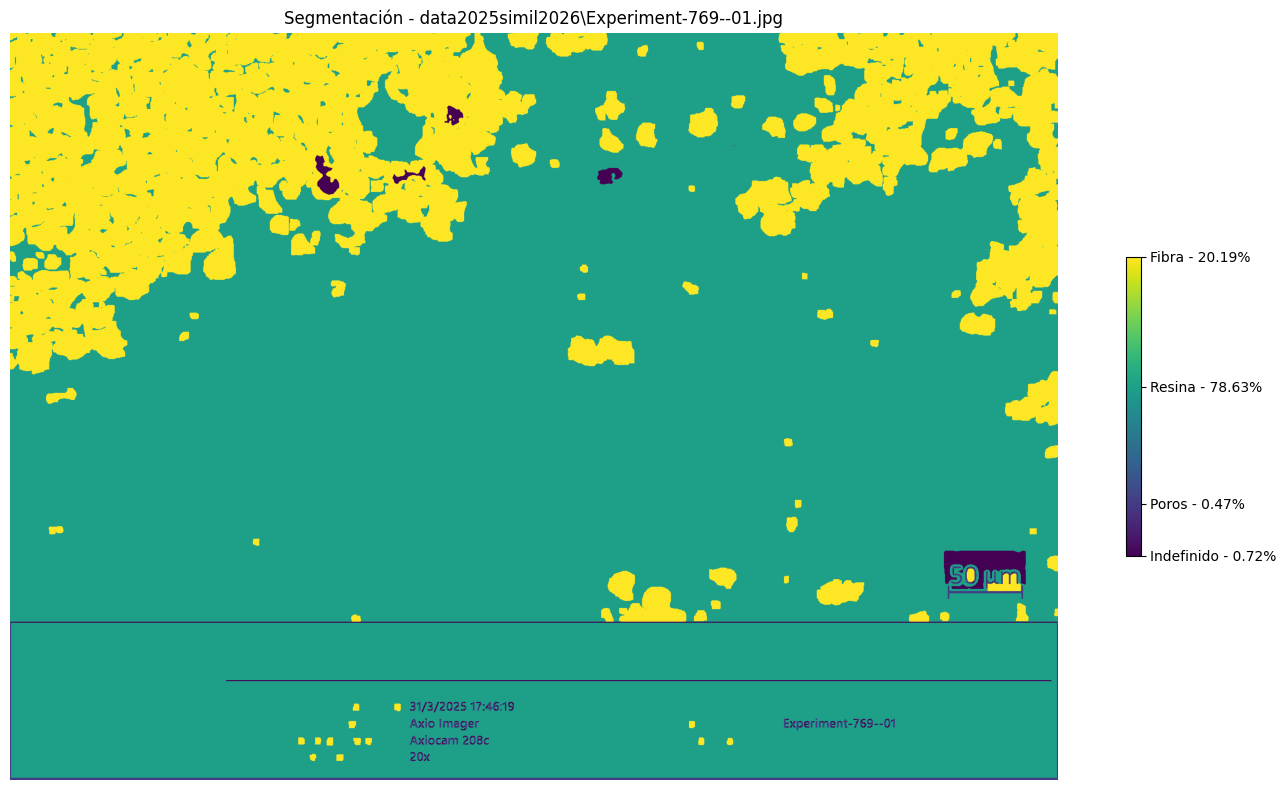

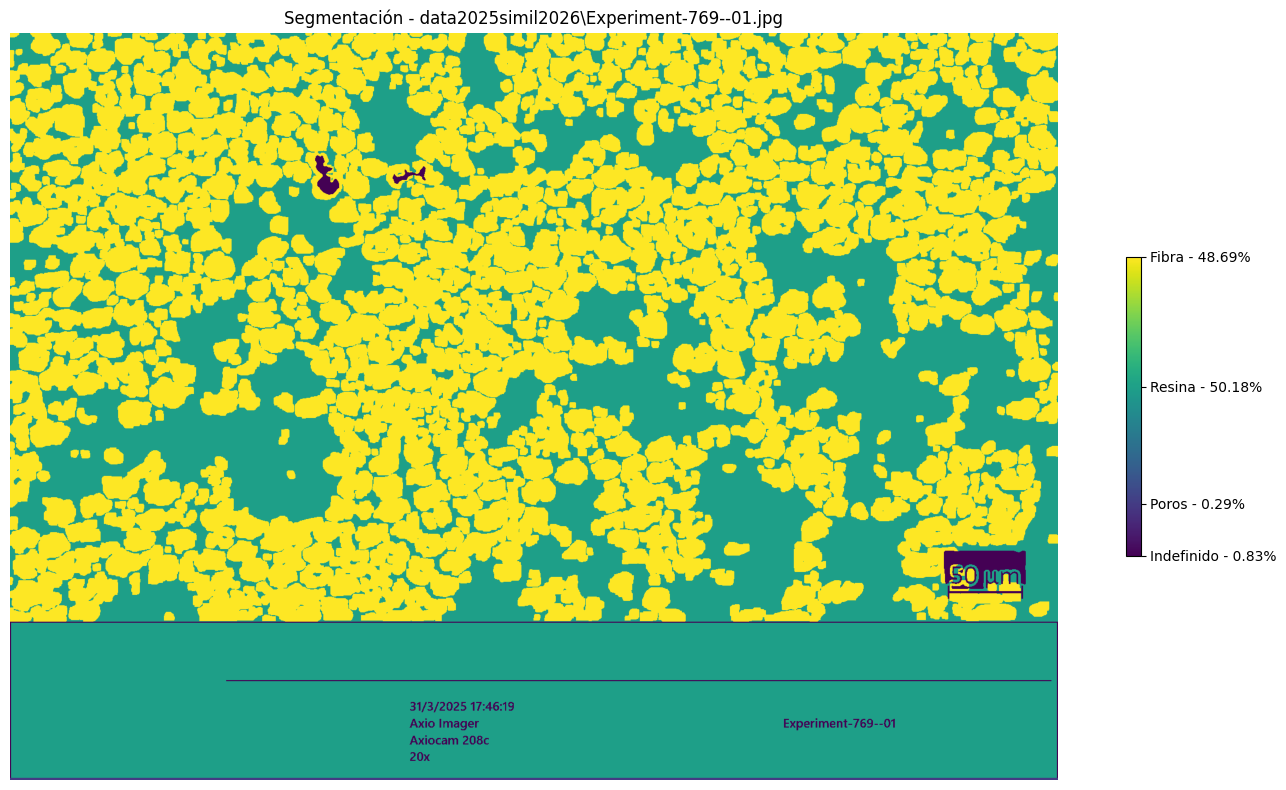

In [18]:
def getSegmentationFigure(segmentation, percentages, filename):
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(segmentation)
    plt.axis('off')

    # Agregar la barra de color con etiquetas personalizadas
    cbar = plt.colorbar(orientation="vertical",shrink=0.4)
    cbar.set_ticks([20,60,150,250])
    cbar.set_ticklabels([
        f"Indefinido - {percentages['undefined']:.2f}%",
        f"Poros - {percentages['pores']:.2f}%",
        f"Resina - {percentages['resin']:.2f}%",
        f"Fibra - {percentages['fibers']:.2f}%"
        ])
    plt.title(f"Segmentación - {filename}")
    plt.tight_layout()

getSegmentationFigure(seg1, perc1, path)
getSegmentationFigure(seg2, perc2, path)

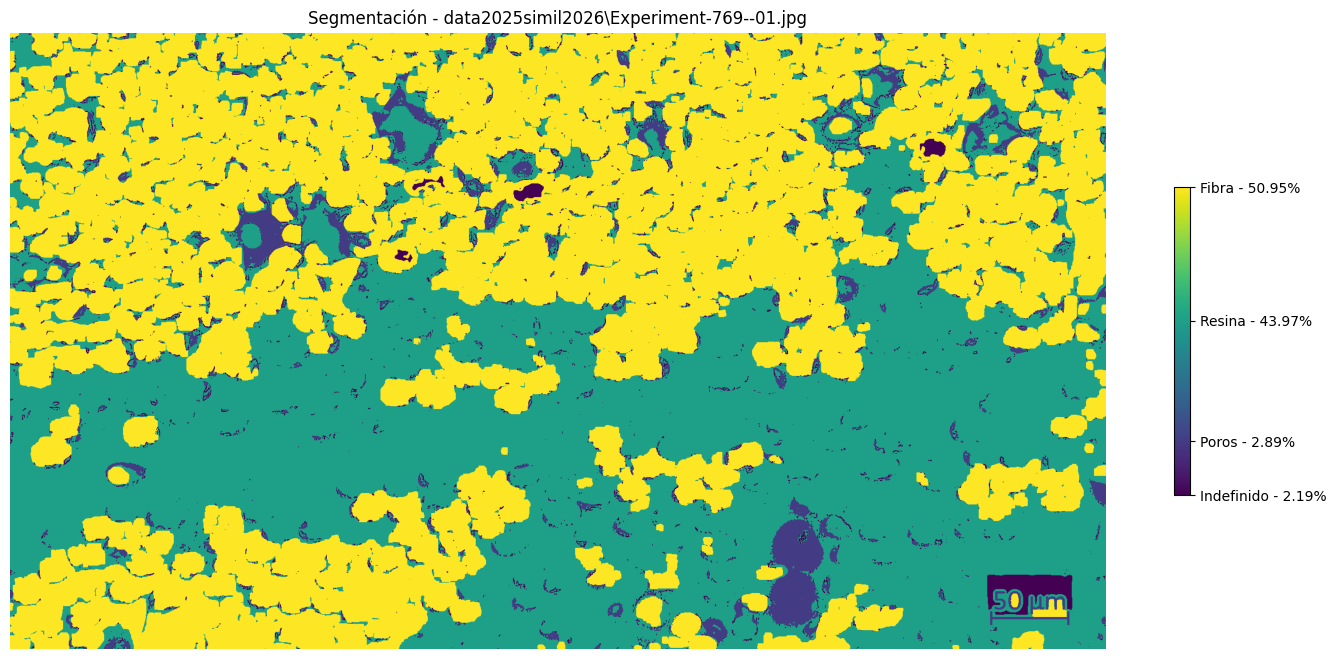

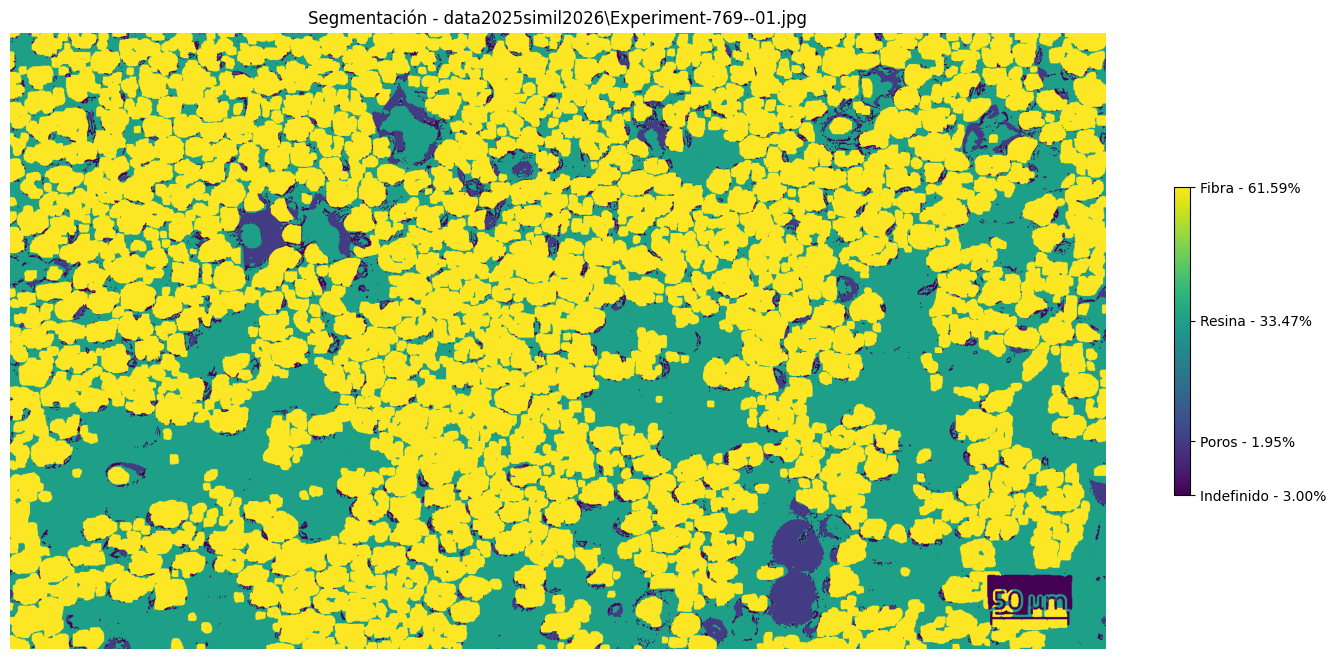

In [32]:
getSegmentationFigure(seg3, perc3, path)
getSegmentationFigure(seg4, perc4, path)